In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

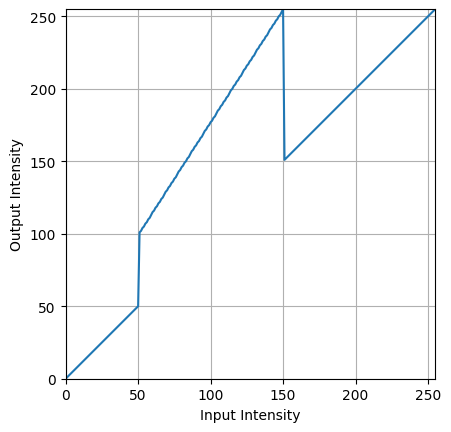

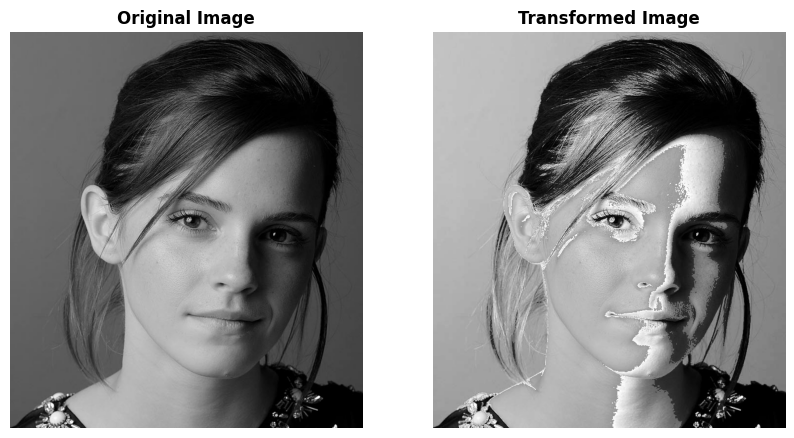

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

c=np.array([(50,50),(50,100),(150,255),(150,150),(255,255)])

t1=np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
#print(len(t1))
t2=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
#print(len(t2))
t3=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
#print(len(t3))
t4=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
#print(len(t4))
t5=np.linspace(c[3,1]+1,c[4,1],c[4,0]-c[3,0]).astype('uint8')
#print(len(t5))

transform=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')
#print(len(transform))

fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
ax.grid(True, which='both')
plt.show()

img_original = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_original, transform)

fig, ax = plt.subplots(1,2,figsize = (10,10))
ax[0].imshow(cv.cvtColor(img_original,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontweight ="bold",fontsize = 12)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(image_transformed,cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image',fontweight ="bold",fontsize = 12)
ax[1].axis('off')

plt.show()


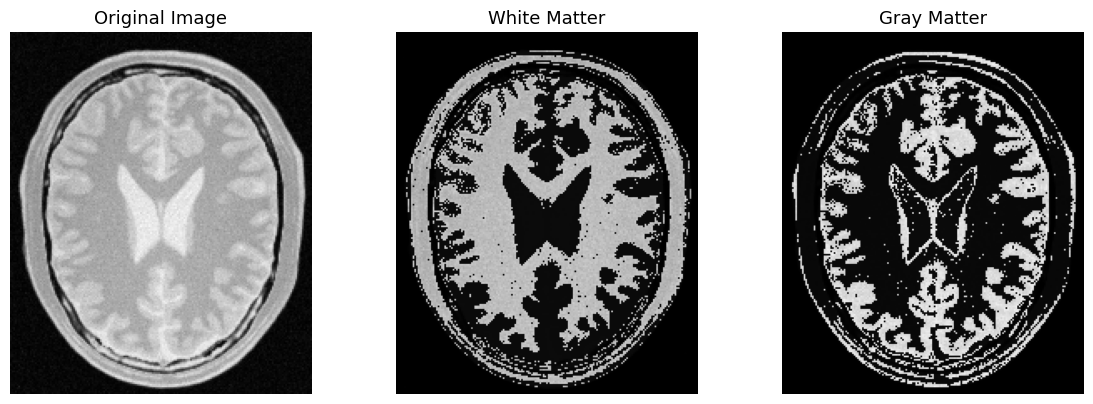

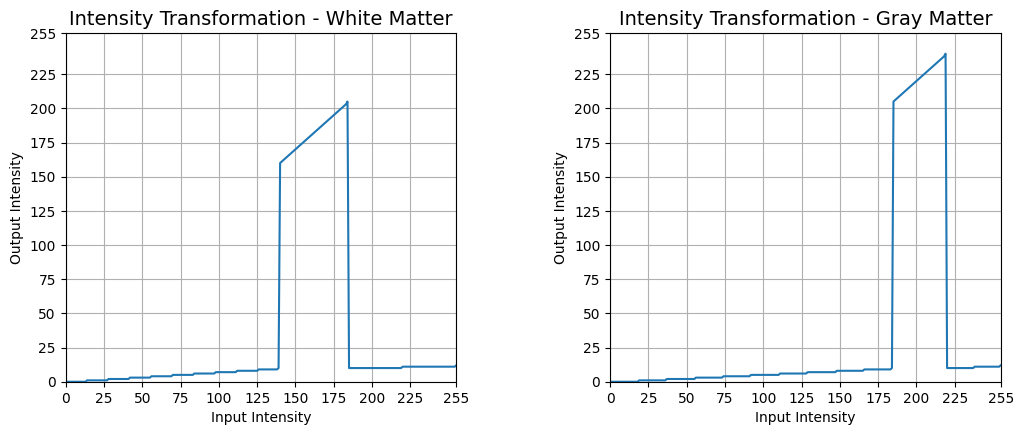

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_original = cv.imread("BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
assert img_original is not None

w_t1 = np.linspace(0, 10, 140)
w_t2 = np.linspace(160, 205, 45)
w_t3 = np.linspace(10, 12, 71)

g_t1 = np.linspace(0, 10, 185)
g_t2 = np.linspace(205, 240, 35)
g_t3 = np.linspace(10, 12, 36)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

white_matter_transformation = np.concatenate((w_t1,w_t2,w_t3),axis=0).astype(np.uint8)
gray_matter_transformation = np.concatenate((g_t1, g_t2, g_t3), axis = 0).astype(np.uint8)

white_matter = cv.LUT(img_original,white_matter_transformation)
gray_matter = cv.LUT(img_original,gray_matter_transformation)

'''
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original Image', img_original)
cv.waitKey(0)
cv.imshow('White Matter', white_matter)
cv.waitKey(0)
cv.imshow('Gray Matter', gray_matter)
cv.waitKey(0)
cv.destroyAllWindows()
'''

fig, ax = plt.subplots(1,3,figsize = (12,12))
fig.tight_layout(pad =3.0)

ax[0].imshow(cv.cvtColor(img_original,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 13)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(white_matter,cv.COLOR_BGR2RGB))
ax[1].set_title('White Matter', fontsize = 13)
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(gray_matter,cv.COLOR_BGR2RGB))
ax[2].set_title('Gray Matter', fontsize = 13)
ax[2].axis('off')

fig, ax = plt.subplots(1,2,figsize = (12,6 ))
fig.tight_layout(pad =8.0)

ax[0].plot(white_matter_transformation)
ax[0].set_title('Intensity Transformation - White Matter', fontsize = 14)
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Output Intensity')

ax[1].plot(gray_matter_transformation)
ax[1].set_title('Intensity Transformation - Gray Matter', fontsize = 14)
ax[1].grid('on')
ax[1].set_xlim([0, 255])
ax[1].set_ylim([0, 255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input Intensity')
ax[1].set_ylabel('Output Intensity')


plt.show()

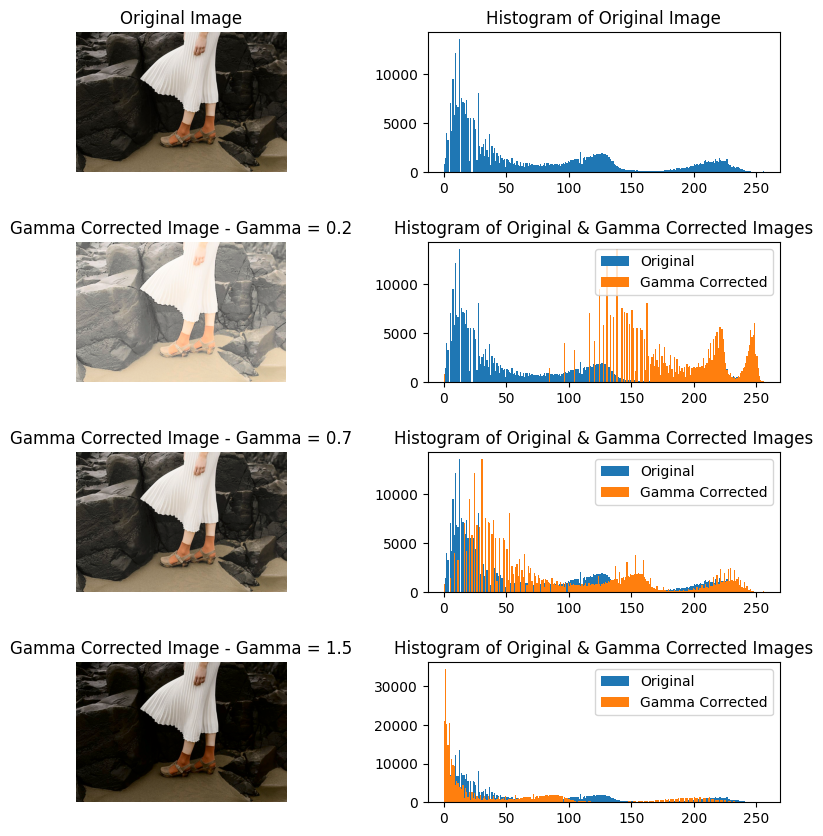

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_original=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
img_Lab=cv.cvtColor(img_original,cv.COLOR_BGR2LAB)
L,a,b=cv.split(img_Lab)

gamma = [0.2, 0.7, 1.5]

fig, ax = plt.subplots(4, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

ax[0][0].imshow(cv.cvtColor(img_original ,cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original Image")
ax[0][0].axis('off')

ax[0][1].hist(L.ravel(), 256, [0, 256])
ax[0][1].set_title("Histogram of Original Image")

img_original=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
img_Lab=cv.cvtColor(img_original,cv.COLOR_BGR2LAB)
L,a,b=cv.split(img_Lab)
gamma = [0.2, 0.7, 1.5]
for i in range(len(gamma)):
    L_new=np.array(255*(L/255)**(gamma[i]),dtype='uint8')
    img_gamma_corrected=cv.merge((L_new,a,b))
    img_gamma_corrected=cv.cvtColor(img_gamma_corrected,cv.COLOR_LAB2BGR)

    ax[i+1][0].imshow(cv.cvtColor(img_gamma_corrected ,cv.COLOR_BGR2RGB))
    ax[i+1][0].set_title("Gamma Corrected Image - Gamma = " + str(gamma[i]))
    ax[i+1][0].axis('off')

    ax[i+1][1].hist(L.ravel(), 256, [0, 256],label='Original')
    ax[i+1][1].set_title("Original Image")

    ax[i+1][1].hist(L_new.ravel(), 256, [0, 256],label='Gamma Corrected')
    ax[i+1][1].set_title("Histogram of Original & Gamma Corrected Images")

    ax[i+1][1].legend()
    
plt.show()




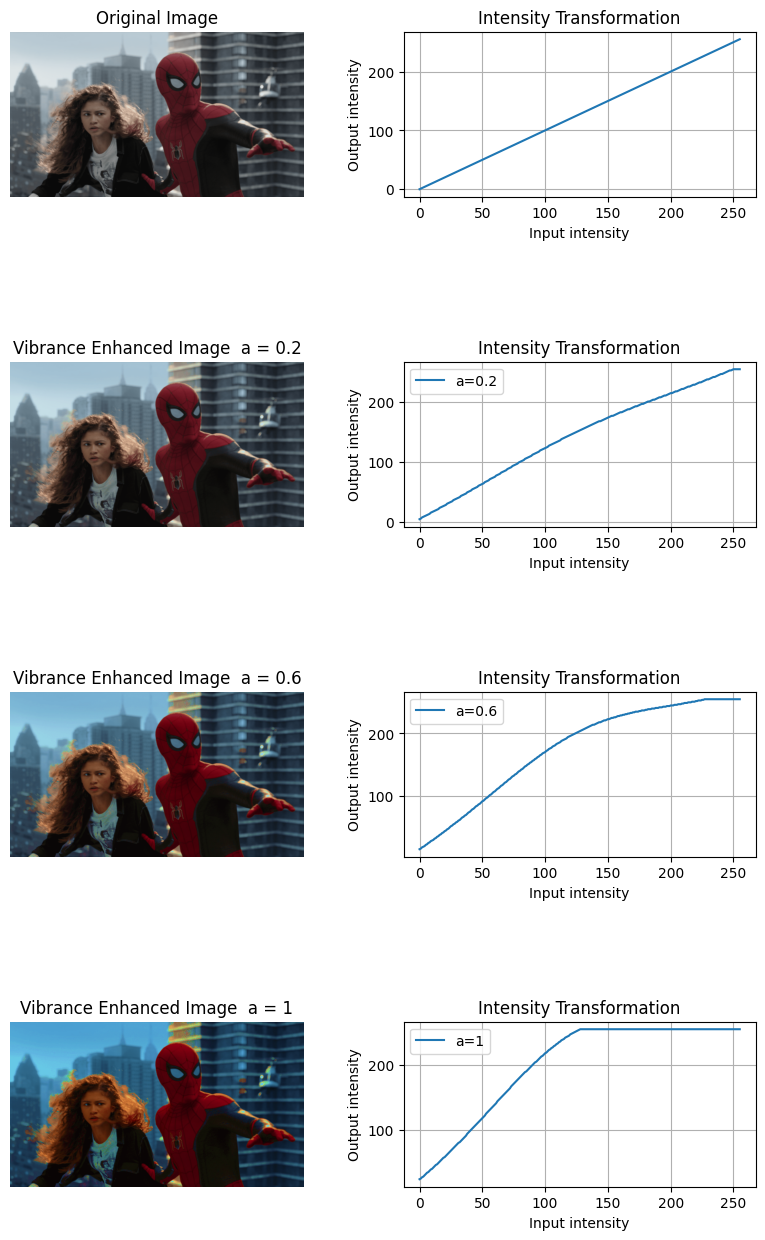

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

a=[0.2,0.6,1]
fig, ax = plt.subplots(len(a)+1, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=1)

ax[0][0].imshow(cv.cvtColor(img_original ,cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original Image")
ax[0][0].axis('off')

x = np.arange(256)
y = intensity_transformation(x, sigma, 0)
ax[0][1].plot(x, y)
ax[0][1].set_title("Intensity Transformation")
ax[0][1].set_xlabel('Input intensity')
ax[0][1].set_ylabel('Output intensity')
ax[0][1].grid('on')

#intensity transformation given
def intensity_transformation(x,sigma,a):
    return np.minimum(x+a*128*(np.exp(-(x-128)**2/(2*sigma**2))),255).astype('uint8')

sigma=70
img_original=cv.imread('spider.png',cv.IMREAD_COLOR)
img_hsv=cv.cvtColor(img_original,cv.COLOR_BGR2HSV)
h,s,v=cv.split(img_hsv) #split the image into hue, saturation, and value planes
a=[0.2,0.6,1]
for i in range(len(a)):
    #apply the transformation to the saturation plane
    s_new=intensity_transformation(s,sigma,a[i])

    #recombine the 3 planes and convert back to RGB
    img_new_s=cv.merge((h,s_new,v))
    img_new=cv.cvtColor(img_new_s,cv.COLOR_HSV2BGR)
    img_new=cv.cvtColor(img_new,cv.COLOR_BGR2RGB)

    ax[i+1][0].imshow(img_new)
    ax[i+1][0].set_title("Vibrance Enhanced Image  a = " + str(a[i]))
    ax[i+1][0].axis('off')
    ax[i+1][0].grid('on')

    x = np.arange(256)
    y = intensity_transformation(x, sigma, a[i])
    ax[i+1][1].plot(x, y, label=f'a={a[i]}')
    ax[i+1][1].set_title("Intensity Transformation")
    ax[i+1][1].set_xlabel('Input intensity')
    ax[i+1][1].set_ylabel('Output intensity')
    ax[i+1][1].legend()
    ax[i+1][1].grid('on')

plt.show()


In [26]:
import numpy as np
import cv2

def histogram_equalization(image):
  # convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # get the histogram of the gray image
  hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
  # normalize the histogram
  hist = hist / hist.sum()
  # compute the cumulative distribution function
  cdf = hist.cumsum()
  # multiply the cdf by 255 to get the new intensity values
  cdf = cdf * 255
  # round the cdf to integer values
  cdf = np.round(cdf).astype(np.uint8)
  # map the original intensity values to the new ones using the cdf
  equalized = cdf[gray]
  # return the equalized image and its histogram
  return equalized, cv2.calcHist([equalized], [0], None, [256], [0, 256])


Text(0.5, 1.0, 'Histogram of Histogram Equalized Image')

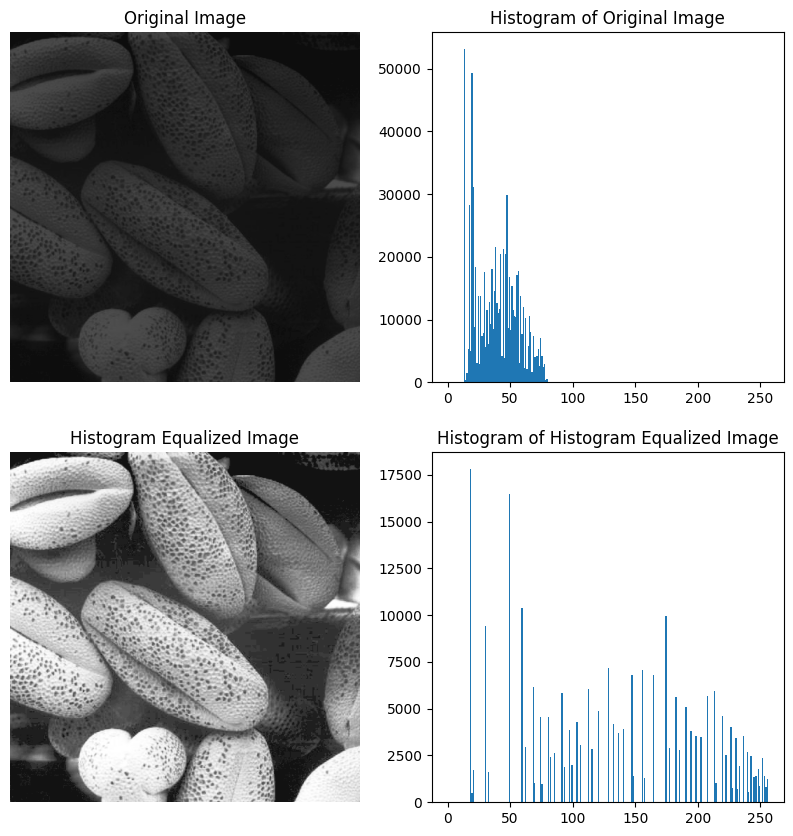

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

img_original=cv.imread('shells.tif',cv.IMREAD_COLOR)

ax[0][0].imshow(cv.cvtColor(img_original ,cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original Image")
ax[0][0].axis('off')

ax[0][1].hist(img_original.flatten(), 256, [0, 256])
ax[0][1].set_title("Histogram of Original Image")

#img_equ=cv.equalizeHist(cv.cvtColor(img_original,cv.COLOR_BGR2GRAY))
img_equ,_=histogram_equalization(img_original)

ax[1][0].imshow(cv.cvtColor(img_equ ,cv.COLOR_GRAY2RGB))
ax[1][0].set_title("Histogram Equalized Image")
ax[1][0].axis('off')

ax[1][1].hist(img_equ.flatten(), 256, [0, 256])
ax[1][1].set_title("Histogram of Histogram Equalized Image")



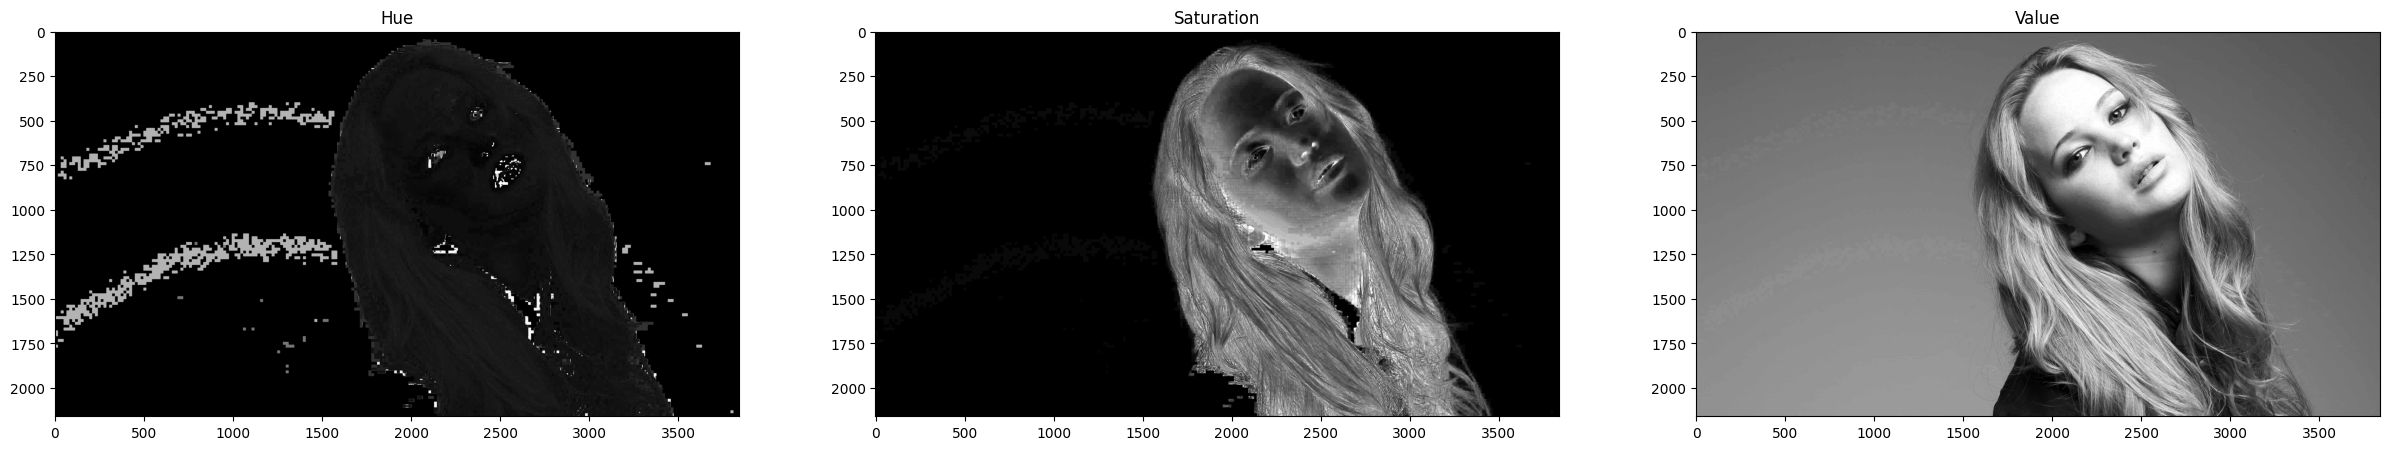

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_original=cv.imread('jeniffer.jpg',cv.IMREAD_COLOR)
img_hsv=cv.cvtColor(img_original,cv.COLOR_BGR2HSV)
h,s,v=cv.split(img_hsv)

plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.imshow(h,cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s,cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v,cmap='gray')
plt.title('Value')

plt.show()




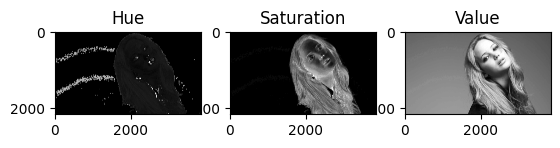

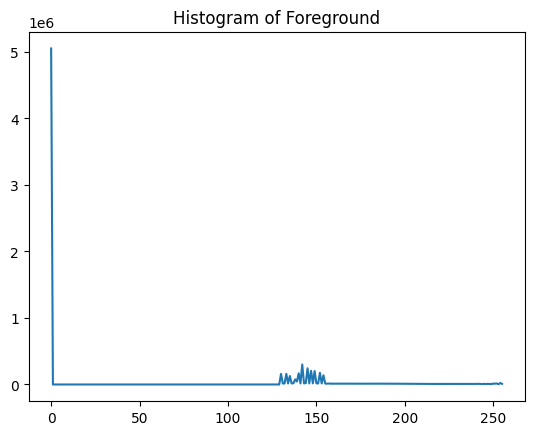

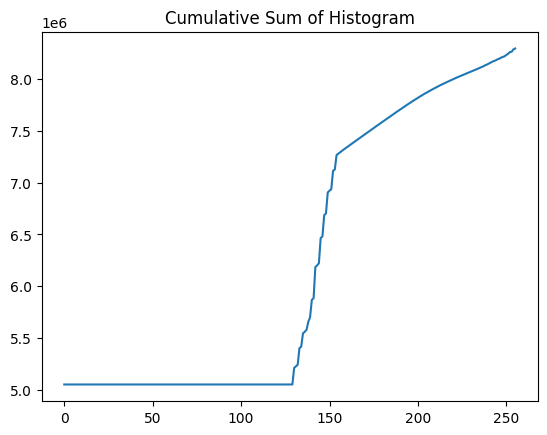

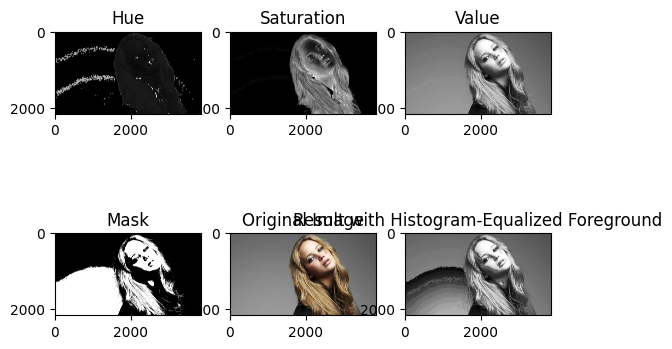

In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert it to HSV
img = cv.imread('jeniffer.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
h, s, v = cv.split(hsv)

# Display the hue, saturation, and value planes in grayscale
plt.subplot(131), plt.imshow(h, cmap='gray'), plt.title('Hue')
plt.subplot(132), plt.imshow(s, cmap='gray'), plt.title('Saturation')
plt.subplot(133), plt.imshow(v, cmap='gray'), plt.title('Value')
plt.show()

# Threshold the value plane to extract the foreground mask
_, mask = cv.threshold(v, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Obtain the foreground using cv.bitwise_and and compute the histogram
foreground = cv.bitwise_and(v, v, mask=mask)
hist = cv.calcHist([foreground], [0], None, [256], [0, 256])

# Plot the histogram of the foreground
plt.plot(hist)
plt.title('Histogram of Foreground')
plt.show()

# Obtain the cumulative sum of the histogram using np.cumsum
cumsum = np.cumsum(hist)

# Plot the cumulative sum of the histogram
plt.plot(cumsum)
plt.title('Cumulative Sum of Histogram')
plt.show()

# Use the formulas in slides to histogram-equalize the foreground
cdf_m = np.ma.masked_equal(cumsum, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
equalized_foreground = cdf[foreground]

# Extract the background and add with the histogram equalized foreground
background = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))
result = cv.add(equalized_foreground, background)

# Show the hue, saturation, and value plane, the mask,
# the original image, and the result with the histogram-equalized foreground
plt.subplot(231), plt.imshow(h, cmap='gray'), plt.title('Hue')
plt.subplot(232), plt.imshow(s, cmap='gray'), plt.title('Saturation')
plt.subplot(233), plt.imshow(v, cmap='gray'), plt.title('Value')
plt.subplot(234), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.subplot(235), plt.imshow(img[...,::-1]), plt.title('Original Image')
plt.subplot(236), plt.imshow(result, cmap='gray'), plt.title('Result with Histogram-Equalized Foreground')
plt.show()


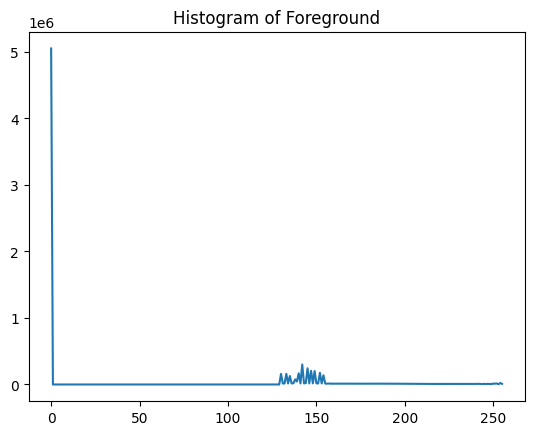

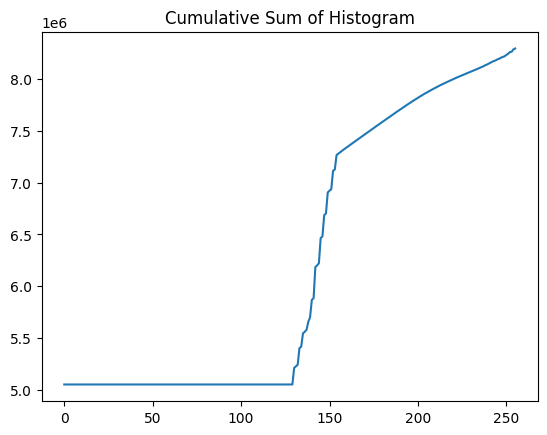

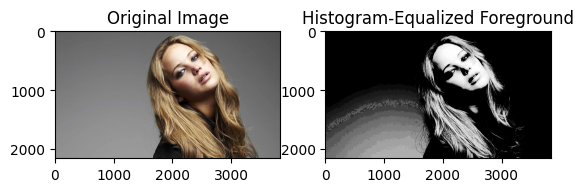

In [33]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert it to HSV
img = cv.imread('jeniffer.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
h, s, v = cv.split(hsv)

# Threshold the value plane to extract the foreground mask
_, mask = cv.threshold(v, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Obtain the foreground using cv.bitwise_and and compute the histogram
foreground = cv.bitwise_and(v, v, mask=mask)
hist = cv.calcHist([foreground], [0], None, [256], [0, 256])

# Plot the histogram of the foreground
plt.plot(hist)
plt.title('Histogram of Foreground')
plt.show()

# Obtain the cumulative sum of the histogram using np.cumsum
cumsum = np.cumsum(hist)

# Plot the cumulative sum of the histogram
plt.plot(cumsum)
plt.title('Cumulative Sum of Histogram')
plt.show()

# Use the formulas in slides to histogram-equalize the foreground
cdf_m = np.ma.masked_equal(cumsum, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
equalized_foreground = cdf[foreground]

# Show the original image and the result with the histogram-equalized foreground
plt.subplot(121), plt.imshow(img[...,::-1]), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_foreground, cmap='gray'), plt.title('Histogram-Equalized Foreground')
plt.show()


(-0.5, 363.5, 379.5, -0.5)

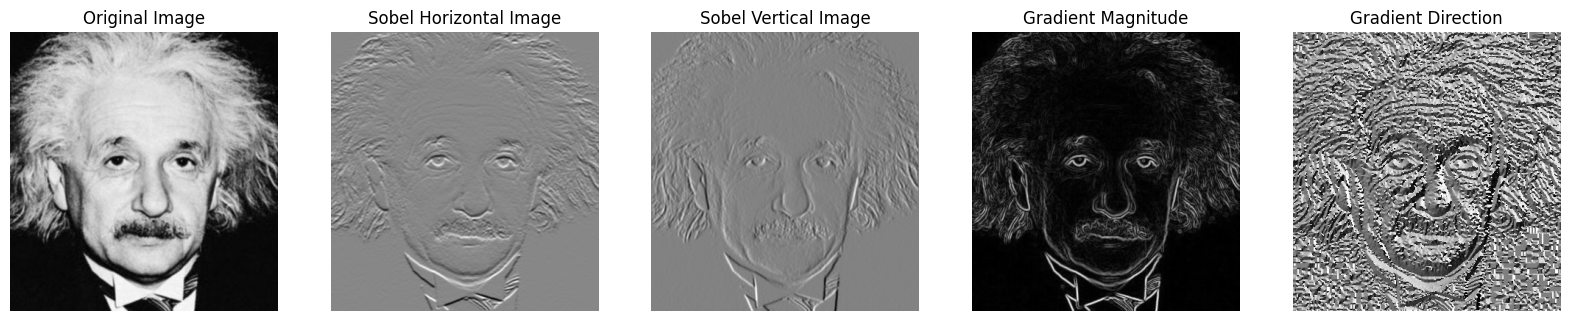

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_original=cv.imread('einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)

#Using the existing filter2D to Sobel filter the image.
#img_sobel=cv.Sobel(img_original,cv.CV_8U,1,1,ksize=3)

sobel_horizontal = np.array( [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ] ).astype(np.float32)
sobel_vertical = np.array( [ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ] ).astype(np.float32)

sobel_horizontal_img = cv.filter2D(img_original, -1, sobel_horizontal)
sobel_vertical_img = cv.filter2D(img_original, -1, sobel_vertical)

gradient_magnitude = np.sqrt(sobel_horizontal_img.astype(np.float64)**2 + sobel_vertical_img.astype(np.float64)**2)
gradient_direction = np.arctan2(sobel_vertical_img.astype(np.float64), sobel_horizontal_img.astype(np.float64))

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].imshow(img_original, cmap = "gray")
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(sobel_vertical_img, cmap = "gray")
ax[1].set_title("Sobel Horizontal Image")
ax[1].axis('off')

ax[2].imshow(sobel_horizontal_img, cmap = "gray")
ax[2].set_title("Sobel Vertical Image")
ax[2].axis('off')

ax[3].imshow(gradient_magnitude, cmap = "gray")
ax[3].set_title("Gradient Magnitude")
ax[3].axis('off')

ax[4].imshow(gradient_direction, cmap = "gray")
ax[4].set_title("Gradient Direction")
ax[4].axis('off')


7)c)

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img_original = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

sobel_horizontal = np.array( [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ] ).astype(np.float32)
sobel_vertical = np.array( [ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ] ).astype(np.float32)

sobel_vertical_img = np.zeros(img_original.shape)
sobel_horizontal_img = np.zeros(img_original.shape)
rows, columns = img_original.shape

# Carry out padding
padding = 0
padded = np.full((rows + 2, columns + 2), padding, dtype=np.uint8)

# copy img image into center of result image
padded[1:rows + 1, 1:columns + 1] = img_original

for i in range(rows):
    for j in range(columns):
        sobel_horizontal_img[i,j] = np.sum(np.multiply(sobel_horizontal, padded[i:i + 3, j:j + 3]))
        
for i in range(rows):
    for j in range(columns):
        sobel_vertical_img[i,j] = np.sum(np.multiply(sobel_vertical, padded[i:i + 3, j:j + 3]))
              
# Gradient Magnitude Kernel
gradient_magnitude = np.sqrt(sobel_horizontal_img.astype(np.float64)**2 + sobel_vertical_img.astype(np.float64)**2)
gradient_direction = np.arctan2(sobel_vertical_img.astype(np.float64), sobel_horizontal_img.astype(np.float64))


# Plot the original image and the result with the Sobel filter applied
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].imshow(img_original, cmap = "gray")
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(sobel_vertical_img, cmap = "gray")
ax[1].set_title("Sobel Horizontal Image")
ax[1].axis('off')

ax[2].imshow(sobel_horizontal_img, cmap = "gray")
ax[2].set_title("Sobel Vertical Image")
ax[2].axis('off')

ax[3].imshow(gradient_magnitude, cmap = "gray")
ax[3].set_title("Gradient Magnitude")
ax[3].axis('off')

ax[4].imshow(gradient_direction, cmap = "gray")
ax[4].set_title("Gradient Direction")
ax[4].axis('off')

plt.show()


In [5]:
import scipy.signal as sig

# Importing the image
img_original = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
assert img_original is not None

sobel_vertical_img = np.zeros(img_original.shape)
sobel_vertical_img_intermediate = np.zeros(img_original.shape)
sobel_horizontal_img = np.zeros(img_original.shape)
sobel_horizontal_img_intermediate = np.zeros(img_original.shape)

# Sobel Vertical Kernel
sobel_vertical_kernel_1 = np.array([[1],[2],[1]])
sobel_vertical_kernel_2 = np.array([[1,0,-1]])

# Sobel Horizontal Kernel
sobel_horizontal_kernel_1 = np.array([[1],[0],[-1]])
sobel_horizontal_kernel_2 = np.array([[1,2,1]])

sobel_vertical_img_intermediate = sig.convolve2d(img_original, sobel_vertical_kernel_1, mode="same")
sobel_vertical_img = sig.convolve2d(sobel_vertical_img_intermediate, sobel_vertical_kernel_2, mode="same")
sobel_horizontal_img_intermediate = sig.convolve2d(img_original, sobel_horizontal_kernel_1, mode="same")
sobel_horizontal_img = sig.convolve2d(sobel_horizontal_img_intermediate, sobel_horizontal_kernel_2, mode="same")
        
# Gradient Magnitude Kernel
gradient_magnitude = np.sqrt(sobel_horizontal_img.astype(np.float64)**2 + sobel_vertical_img.astype(np.float64)**2)
gradient_direction = np.arctan2(sobel_vertical_img.astype(np.float64), sobel_horizontal_img.astype(np.float64))

# Plot the original image and the result with the Sobel filter applied
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].imshow(img_original, cmap = "gray")
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(sobel_vertical_img, cmap = "gray")
ax[1].set_title("Sobel Horizontal Image")
ax[1].axis('off')

ax[2].imshow(sobel_horizontal_img, cmap = "gray")
ax[2].set_title("Sobel Vertical Image")
ax[2].axis('off')

ax[3].imshow(gradient_magnitude, cmap = "gray")
ax[3].set_title("Gradient Magnitude")
ax[3].axis('off')

ax[4].imshow(gradient_direction, cmap = "gray")
ax[4].set_title("Gradient Direction")
ax[4].axis('off')

plt.show()

In [6]:
def zoom_nearest_neighbour(factor, image):
    rows = int(factor*image.shape[0])
    columns = int(factor*image.shape[1])
    
    zoomed = np.zeros((rows,columns,3),dtype = image.dtype)
    for i in range(rows):
        for j in range(columns):
            zoomed[i,j] = image[int(i/factor),int(j/factor)]
    return zoomed

In [7]:
def zoom_bilinear_interpolation(factor, image):
    rows = int(factor*image.shape[0])
    columns = int(factor*image.shape[1])
    
    zoomed = cv.resize(image,(columns,rows),interpolation = cv.INTER_LINEAR)
    return zoomed

In [8]:
# Original images
img01 = cv.imread('zooming\im01.png', cv.IMREAD_COLOR)
assert img01 is not None
img02 = cv.imread('zooming\im02.png', cv.IMREAD_COLOR)
assert img02 is not None
img03 = cv.imread('zooming\im03.png', cv.IMREAD_COLOR)
assert img03 is not None
img04 = cv.imread('zooming\im04.png', cv.IMREAD_COLOR)
assert img04 is not None
img05 = cv.imread('zooming\im05.png', cv.IMREAD_COLOR)
assert img05 is not None
img06 = cv.imread('zooming\im06.png', cv.IMREAD_COLOR)
assert img06 is not None
img07 = cv.imread('zooming\im07.png', cv.IMREAD_COLOR)
assert img07 is not None
img08 = cv.imread('zooming\im08.png', cv.IMREAD_COLOR)
assert img08 is not None
img09 = cv.imread('zooming\im09.png', cv.IMREAD_COLOR)
assert img09 is not None
img10 = cv.imread('zooming\im10.png', cv.IMREAD_COLOR)
assert img10 is not None
img11 = cv.imread('zooming\im11.png', cv.IMREAD_COLOR)
assert img11 is not None

# Zoomed-out images
img01_small = cv.imread('zooming\im01small.png', cv.IMREAD_COLOR)
assert img01_small is not None
img02_small = cv.imread('zooming\im02small.png', cv.IMREAD_COLOR)
assert img02_small is not None
img03_small = cv.imread('zooming\im03small.png', cv.IMREAD_COLOR)
assert img03_small is not None
img04_small = cv.imread('zooming\im04small.png', cv.IMREAD_COLOR)
assert img04_small is not None
img05_small = cv.imread('zooming\im05small.png', cv.IMREAD_COLOR)
assert img05_small is not None
img06_small = cv.imread('zooming\im06small.png', cv.IMREAD_COLOR)
assert img06_small is not None
img07_small = cv.imread('zooming\im07small.png', cv.IMREAD_COLOR)
assert img07_small is not None
img08_small = cv.imread('zooming\im08small.png', cv.IMREAD_COLOR)
assert img08_small is not None
img09_small = cv.imread('zooming\im09small.png', cv.IMREAD_COLOR)
assert img09_small is not None
img10_small = cv.imread('zooming\im10small.png', cv.IMREAD_COLOR)
assert img10_small is not None
img11_small = cv.imread('zooming\im11small.png', cv.IMREAD_COLOR)
assert img11_small is not None

In [51]:

def ssd(img1, img2):
    if img1.shape!=img2.shape:
        return -1

    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    
    ssd = np.sum((img1 - img2) ** 2)/(255**2)
    ssd /= (3 * img1.shape[0] * img1.shape[1])

    return ssd


In [55]:
original_images_large = [img01, img02, img03, img04, img05, img06, img07, img08, img09, img10, img11]
original_images_small = [img01_small, img02_small, img03_small, img04_small, img05_small, img06_small, img07_small, img08_small, img09_small, img10_small, img11_small]
ssd_nearest_neighbour = []

factor=4
fig, ax = plt.subplots(11, 3, figsize=(10,30))
# Zooming using nearest neighbour interpolation
for i in range(len(original_images_small)):
    zoomed = zoom_nearest_neighbour(factor, original_images_small[i])
    print(original_images_small[i].shape,zoomed.shape, original_images_large[i].shape)
    ax[i][0].imshow(cv.cvtColor(original_images_small[i],cv.COLOR_BGR2RGB))
    ax[i][0].set_title("Original Image (small)")
    ax[i][0].axis('on')
    ax[i][1].imshow(cv.cvtColor(zoomed,cv.COLOR_BGR2RGB))
    ax[i][1].set_title("Zoomed Image")
    ax[i][1].axis('on')
    ax[i][2].imshow(cv.cvtColor(original_images_large[i],cv.COLOR_BGR2RGB))
    ax[i][2].set_title("Original Image (large)")
    ax[i][2].axis('on')
    ssd_nearest_neighbour.append(ssd(original_images_large[i], zoomed))
plt.show()
print(ssd_nearest_neighbour)
for i in range(len(ssd_nearest_neighbour)):
    if ssd_nearest_neighbour[i]==-1:
        p="The shapes of the two input images do not match"
    else:
        p=str(ssd_nearest_neighbour[i])    
    print('image-',i,' : ',p)

(270, 480, 3) (1080, 1920, 3) (1080, 1920, 3)
(300, 480, 3) (1200, 1920, 3) (1200, 1920, 3)
(365, 600, 3) (1460, 2400, 3) (1459, 2400, 3)
(540, 960, 3) (2160, 3840, 3) (2160, 3840, 3)
(300, 480, 3) (1200, 1920, 3) (1200, 1920, 3)
(270, 480, 3) (1080, 1920, 3) (1080, 1920, 3)
(400, 640, 3) (1600, 2560, 3) (1600, 2560, 3)
(333, 500, 3) (1332, 2000, 3) (1333, 2000, 3)
(300, 400, 3) (1200, 1600, 3) (1200, 1600, 3)
(265, 512, 3) (1060, 2048, 3) (1059, 2048, 3)
(167, 250, 3) (668, 1000, 3) (500, 750, 3)


[0.0020956409611371375, 0.0004067062169820724, -1, 0.012111156994065278, 0.004395867116636051, 0.002885211291003935, 0.0028874577085736255, -1, 0.0008133105215942586, -1, -1]
image- 0  :  0.0020956409611371375
image- 1  :  0.0004067062169820724
image- 2  :  The shapes of the two input images do not match
image- 3  :  0.012111156994065278
image- 4  :  0.004395867116636051
image- 5  :  0.002885211291003935
image- 6  :  0.0028874577085736255
image- 7  :  The shapes of the two input images do not match
image- 8  :  0.0008133105215942586
image- 9  :  The shapes of the two input images do not match
image- 10  :  The shapes of the two input images do not match
